In [66]:
from matplotlib import pyplot as plt
import numpy as np
import pickle
import seaborn as sns

In [67]:
with open('attention.pck','rb') as f:
    data = pickle.load(f)

In [68]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
special_tokens_dict = {"additional_special_tokens": ['[UTTR]']}
tokenizer.add_special_tokens(special_tokens_dict)

1

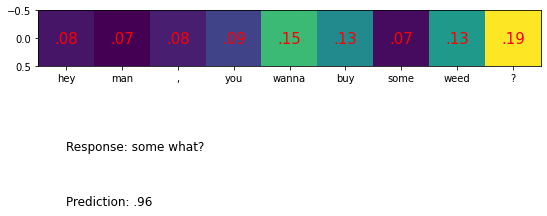

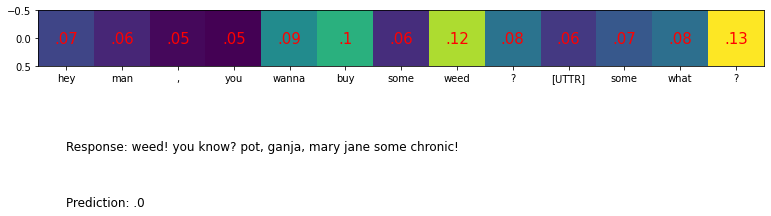

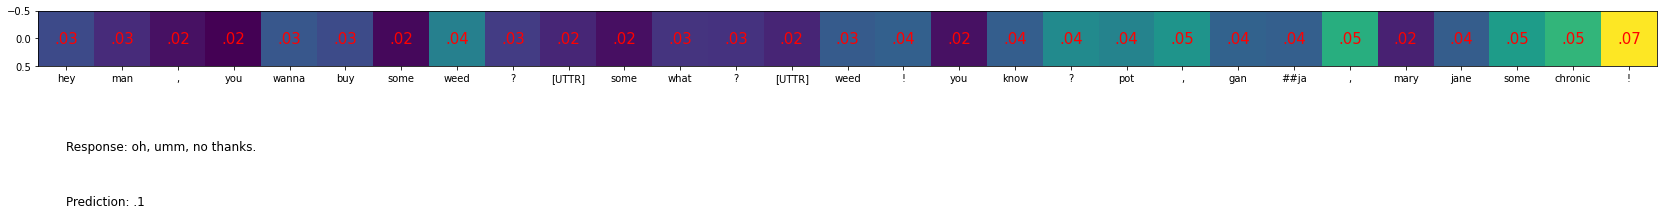

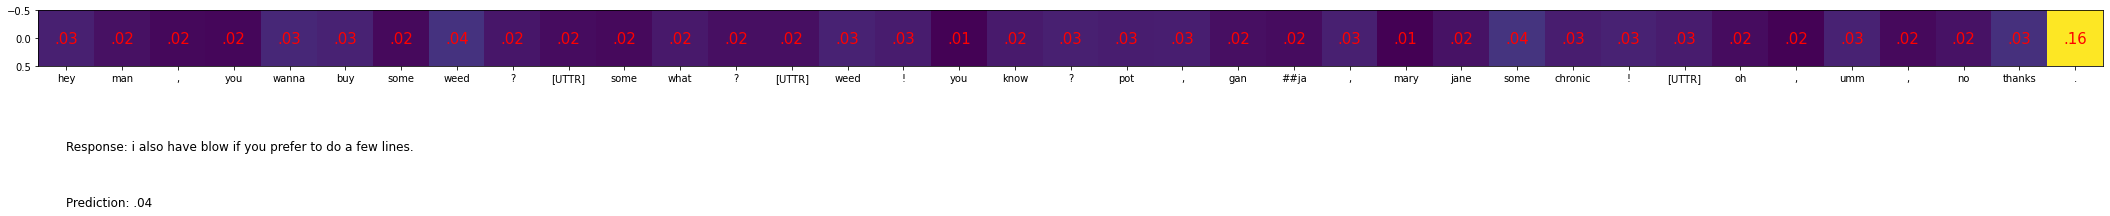

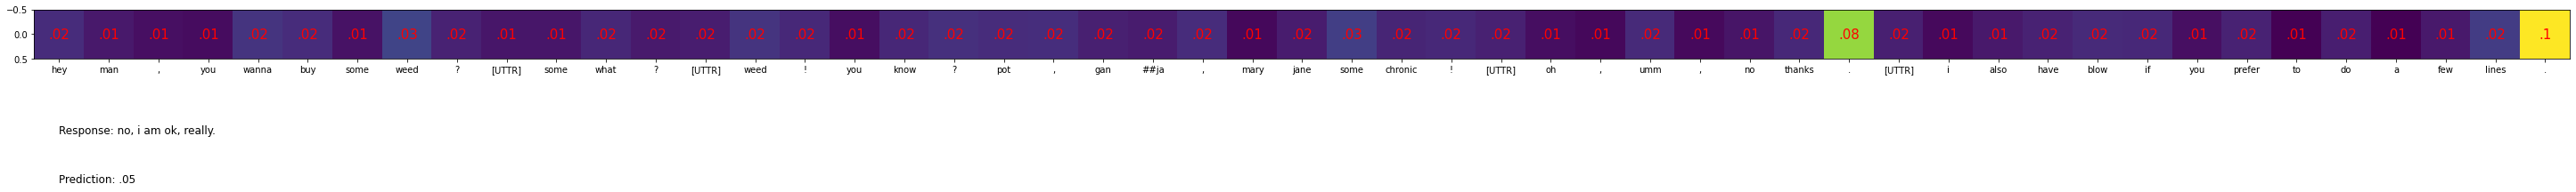

KeyboardInterrupt: Interrupted by user

In [113]:
for data_idx,sample in enumerate(data):
    attention = sample['attention']
    ids = sample['feature']
    assert len(attention) == len(ids)
    try:
        assert ids.count(102) ==2
    except:
        continue
    context = ids[:ids.index(102)][1:]
    response = ids[2+len(context):][:-1]
    attention = attention[1:1+len(context)]
    attention /= sum(attention)
    context = tokenizer.convert_ids_to_tokens(context)
    response = tokenizer.decode(response)
    fig,ax = plt.subplots(figsize=(len(context),len(context)))
    im = ax.imshow([attention])
    ax.set_xticks(np.arange(len(context)))
    ax.set_xticklabels(context)
    for score_idx,score in enumerate(attention):
        ax.text(score_idx,0, str(round(score,2))[1:],ha="center",va="center",color='red',fontsize=15)
    ax.text(0,2,'Response: ' + response,color='black',fontsize=12)
    ax.text(0,3,"Prediction: "+str(round(sample['prediction'],2))[1:],color='black',fontsize=12)
    plt.show()
    input()
    
    